In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
hawaii_measurements= base.classes.measurement
hawaii_stations= base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_row = session.query(hawaii_measurements).order_by(hawaii_measurements.date.desc()).first()
last_row.date

'2017-08-23'

In [10]:
last_12_mo = session.query(hawaii_measurements).order_by(hawaii_measurements.date.desc()).filter(hawaii_measurements.date > "2016-8-23").all

year_ago = dt.date(2017, 8 , 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', None), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', None), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', None), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', None), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-12', 0.0), ('2017-

<Axes: xlabel='Date', ylabel='Inches'>

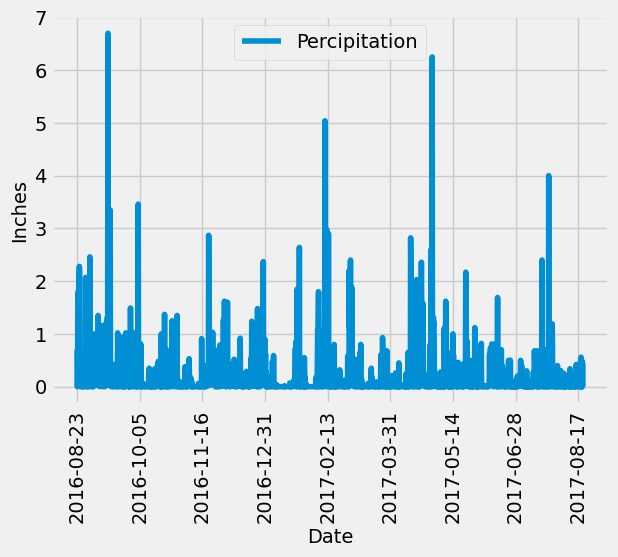

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 , 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_mo= session.query(hawaii_measurements.date, hawaii_measurements.prcp).\
    filter(hawaii_measurements.date > "2016-08-22").\
    order_by(hawaii_measurements.date.desc()).all()
print(last_12_mo)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12_mo_df= pd.DataFrame(last_12_mo, columns=["Date", "Percipitation"])
#drop null values
last_12_mo_df= last_12_mo_df.dropna(how="any")

# Sort the dataframe by date
last_12_mo_df=last_12_mo_df.sort_values(by="Date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_12_mo_df.plot("Date","Percipitation", rot=90, ylabel="Inches")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_12_mo_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(hawaii_measurements.station).distinct().count()
print(stations)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
act_station = session.query(hawaii_measurements.station, (func.count(hawaii_measurements.station))).\
    group_by(hawaii_measurements.station).\
    order_by(func.count(hawaii_measurements.station).desc()).all()
act_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act= session.query(func.min(hawaii_measurements.tobs), func.max(hawaii_measurements.tobs), func.avg(hawaii_measurements.tobs)).filter(hawaii_measurements.station == "USC00519281").first()

Text(0.5, 0, 'Temperature')

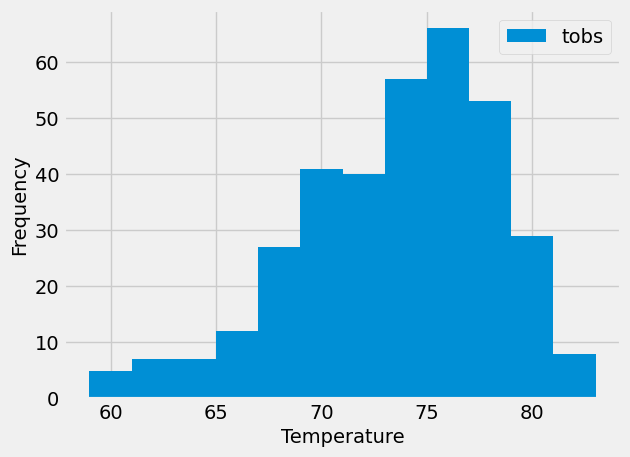

In [16]:
# Using the most active station id
last_12_mo_act= session.query(hawaii_measurements.date, hawaii_measurements.tobs).\
    filter(hawaii_measurements.date > "2016-08-22").\
    filter(hawaii_measurements.station == "USC00519281").all()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_mo_act = pd.DataFrame(last_12_mo_act)
last_12_mo_act.plot(kind="hist", bins=12)
plt.xlabel("Temperature")

# Close Session

In [17]:
# Close Session
session.close()